In [1]:
pip install faststylometry

Note: you may need to restart the kernel to use updated packages.


In [2]:
from faststylometry import Corpus
from faststylometry import load_corpus_from_folder
from faststylometry import tokenise_remove_pronouns_en
from faststylometry import calculate_burrows_delta
from faststylometry import predict_proba, calibrate
from faststylometry import get_calibration_curve 
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekaan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
train_corpus = load_corpus_from_folder("faststylometry/faststylometry/data/train")

train_corpus.tokenise(tokenise_remove_pronouns_en)

# Load Sense and Sensibility, written by Jane Austen (marked as "janedoe")
# and Villette, written by Charlotte Brontë (marked as "currerbell", Brontë's real pseudonym)

test_corpus = load_corpus_from_folder("faststylometry/faststylometry/data/test", pattern=None)
# You can set pattern to a string value to just load a subset of the corpus.

test_corpus.tokenise(tokenise_remove_pronouns_en)

In [105]:
calculate_burrows_delta(train_corpus, test_corpus, vocab_size = 50)

,Bahtin - Проблемы_творчества_Достоевского,Bahtin - Теория романа,Losev - ВЕЩЬ_И_ИМЯ,Losev - Диалектика_мифа,Losev - Диалектика_числа_у_Плотина
author,,,,,
BahtinM,2.973251,2.549571,2.920265,2.659378,2.882461
LosevA,3.520500,3.347388,2.552652,2.188021,2.497560


In [106]:
train_corpus.top_tokens

['и',
 'в',
 'не',
 'как',
 'его',
 'с',
 'есть',
 'к',
 'но',
 'что',
 'на',
 'это',
 'только',
 'или',
 'мы',
 'то',
 'для',
 'а',
 'от',
 'себя',
 'я',
 'о',
 'все',
 'же',
 'он',
 'быть',
 'может',
 'жизни',
 'бы',
 'из',
 'по',
 'ее',
 'слова',
 'так',
 'сущности',
 'себе',
 'здесь',
 'героя',
 'уже',
 'другого',
 'их',
 'во',
 'человека',
 'она',
 'момент',
 'этого',
 'слово',
 'оно',
 'если',
 'нет']

In [107]:
from sklearn.decomposition import PCA
import re
import pandas as pd

In [108]:
# Reload the training corpus as the "test corpus", re-tokenise it, and segment it this time
test_corpus = load_corpus_from_folder("faststylometry/faststylometry/data/test")
test_corpus.tokenise(tokenise_remove_pronouns_en)

In [109]:
split_test_corpus = test_corpus.split(80000)

In [110]:
df_delta = calculate_burrows_delta(train_corpus, split_test_corpus)

In [111]:
df_z_scores = split_test_corpus.df_author_z_scores

In [112]:
df_z_scores

,и,в,не,как,его,с,есть,к,но,что,...,их,во,человека,она,момент,этого,слово,оно,если,нет
author_book,,,,,,,,,,,,,,,,,,,,,
Bahtin - Проблемы_творчества_Достоевского_0,-2.359199,2.305092,-17.471201,-0.692856,0.597098,6.393408,-1.115649,0.950231,-2.540413,-0.071129,...,0.339852,-0.274457,-0.228096,-0.632375,-2.281990,-0.798737,1.445197,-5.099675,-0.839068,-5.093841
Bahtin - Проблемы_творчества_Достоевского_1,-3.511559,11.606961,-49.863757,-1.741748,-0.579863,21.347975,-1.146237,1.277180,-3.008469,-0.359133,...,-0.339838,0.112335,-0.441545,-1.431583,-2.581129,-5.633207,-0.884118,-7.231496,-0.929553,-11.025390
Bahtin - Теория романа_0,0.809384,4.138420,-35.306498,-2.679906,0.194303,2.787999,-1.193825,0.152635,-2.638058,-1.125581,...,0.570820,-0.052914,1.134726,-0.891314,-1.747466,0.728893,1.824792,0.629625,-1.077468,-7.598776
Bahtin - Теория романа_1,1.471743,5.440715,-39.433674,-2.820656,-0.115539,2.248728,-1.049634,-0.116322,-0.782810,-0.833873,...,1.205982,0.408632,0.908933,-0.891314,-1.747466,2.638430,-0.999839,-2.917085,-0.878802,-3.590880
Bahtin - Теория романа_2,-3.873675,0.800499,-51.446705,-2.878611,-0.509885,6.131476,-1.159080,0.426229,-4.363112,-0.817136,...,0.039594,-1.160625,-0.050687,-1.060620,-2.266269,-5.381627,-0.798877,-6.645677,-1.013895,-9.226984
Bahtin - Теория романа_3,-8.179123,-5.778266,-74.241149,-4.245035,-1.180456,8.317145,-1.241328,0.730929,-5.434216,-0.921754,...,-1.309410,-1.227573,-0.354106,-1.527460,-2.643580,-10.615013,-0.081235,-12.417614,-1.008189,-15.039256
Losev - ВЕЩЬ_И_ИМЯ_0,1.658108,-10.789728,32.755105,-0.756006,-0.806320,1.706445,0.854315,-0.599437,2.553869,1.662880,...,0.559960,-1.370304,-0.613642,1.243001,-1.575702,1.467726,-1.085140,10.709020,1.305822,2.584325
Losev - Диалектика_мифа_0,0.491286,-10.525939,38.476837,-0.285930,-0.676291,-1.284053,0.653830,-0.935983,2.139403,1.605655,...,0.556557,-0.530983,-0.625259,0.994731,-2.073167,-1.423549,-1.377562,1.616688,0.983179,7.197460
Losev - Диалектика_числа_у_Плотина_0,-0.207427,-10.199467,19.673385,1.451501,-0.901413,-0.077839,0.201178,-0.501208,1.674579,1.841709,...,1.021207,-0.828312,-0.776450,0.463133,-2.266269,1.206277,-1.870674,12.906695,2.879971,0.041276


In [113]:
pca_model = PCA(n_components=2)
pca_matrix = pca_model.fit_transform(df_z_scores)

In [114]:
pca_matrix

array([[ -1.44425063,  25.26292136],
       [ 34.57958263,  29.78611034],
       [ 17.808643  , -13.817937  ],
       [ 23.96152793, -20.7449847 ],
       [ 38.35856653, -17.33896983],
       [ 61.17337811,   2.92083115],
       [-56.8943459 ,  -4.14145147],
       [-60.0577275 ,  -8.15804152],
       [-49.72871123,  10.5109693 ],
       [ -7.75666295,  -4.27944762]])

In [115]:
authors = df_z_scores.index.map(lambda x : re.sub(" - .+", "", x))

In [116]:
authors

Index(['Bahtin', 'Bahtin', 'Bahtin', 'Bahtin', 'Bahtin', 'Bahtin', 'Losev',
       'Losev', 'Losev', 'Losev'],
      dtype='object', name='author_book')

In [117]:
df_pca_by_author = pd.DataFrame(pca_matrix)
df_pca_by_author["author"] = authors

Text(0.5, 1.0, 'Representation using PCA of works in training corpus')

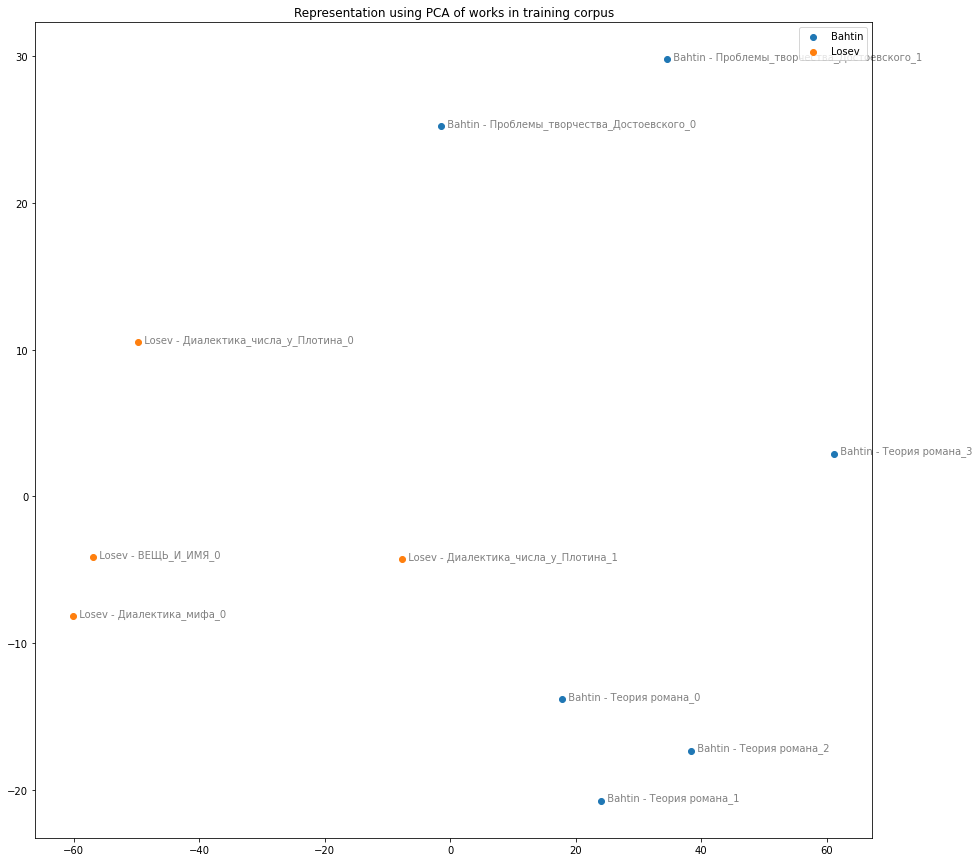

In [118]:
plt.figure(figsize=(15,15)) 

for author, pca_coordinates in df_pca_by_author.groupby("author"):
    plt.scatter(*zip(*pca_coordinates.drop("author", axis=1).to_numpy()), label=author)
for i in range(len(pca_matrix)):
    plt.text(pca_matrix[i][0], pca_matrix[i][1],"  " + df_z_scores.index[i], alpha=0.5)

plt.legend()

plt.title("Representation using PCA of works in training corpus")